In [1]:
# TFD: https://github.com/hycis/lisa_emotiw/blob/master/emotiw/common/datasets/faces/tfd.py 
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import sys, glob, os
from scipy import io as sio

In [2]:
facial_expr_X_test = np.load('/home/thanhnt/nn/pib/data/TFD/facial_expr_X_test.npy')
facial_expr_Y_test = np.load('/home/thanhnt/nn/pib/data/TFD/facial_expr_Y_test.npy')
facial_expr_X_test_unique = np.load('/home/thanhnt/nn/pib/data/TFD/facial_expr_X_test_unique.npy')

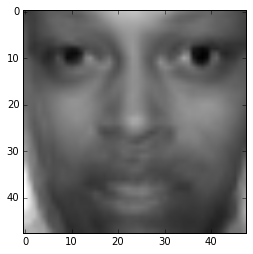

In [3]:
img = np.reshape(facial_expr_X_test_unique[3], (48,48) )
plt.imshow(img, cmap='gray')

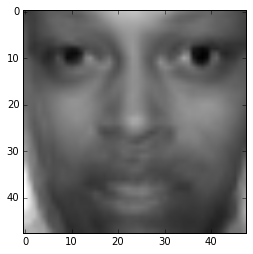

In [4]:
img = np.reshape(facial_expr_X_test[40], (48,48) )
plt.imshow(img, cmap='gray')

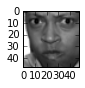

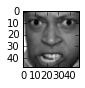

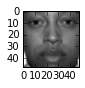

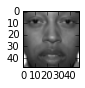

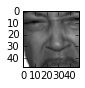

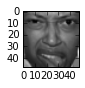

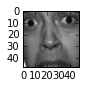

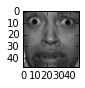

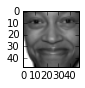

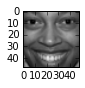

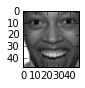

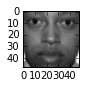

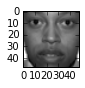

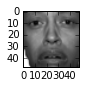

In [5]:
for i in range(40, 54):
    img = np.reshape(facial_expr_Y_test[i], (48,48) )
    plt.figure(figsize=(1,1))
    plt.imshow(img, cmap='gray')
    plt.show()

In [6]:
import tensorflow as tf 
from utils import * 
from model import * 
from config import cfg 

input = tf.placeholder(tf.float32, [None, cfg.in_dim], 'input')
train_model = pib(input, cfg)
test_model = pib(input, cfg, is_train=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
The total number of trainable parameters: 2628096
The total number of trainable parameters: 2628096


In [64]:
face_in = facial_expr_X_test_unique #np.expand_dims(facial_expr_X_test_unique[3], 0)
sess_cfg = tf.ConfigProto();
sess_cfg.gpu_options.allow_growth = True
saver = tf.train.Saver()
with tf.Session(config=sess_cfg) as sess:
#     saver.restore(sess, tf.train.latest_checkpoint(cfg.logdir))
    saver.restore(sess, os.path.join(cfg.logdir, 'model.ckpt-3010'))
    gen_output = test_tfd(train_model, sess, face_in , cfg.gen_dir, 9999999)

Saving gen at gen_at_epoch_9999999.png


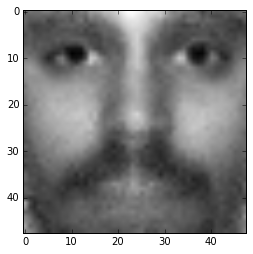

In [62]:
i = 100
img = np.reshape(gen_output[3,i,:], (48,48))
plt.imshow(img, cmap='gray')

[145, 264, 324, 308, 545, 109, 498, 515, 370, 403]


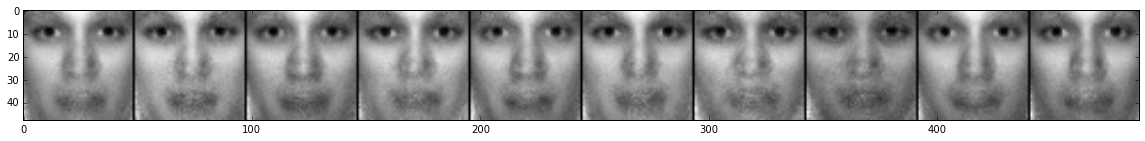

In [65]:
n_modes = gen_output.shape[1]
particle_range = range(n_modes)
np.random.shuffle(particle_range)

NUM_SAMPLES = 10
temp_idx = particle_range[:NUM_SAMPLES]
print(temp_idx)
gen_data = tile_raster_images(
    X = gen_output[3, temp_idx,:], 
    img_shape = (48, 48), 
    tile_shape = (1, 10),
    tile_spacing = (1,1)
)

plt.figure(figsize=(20,200))
plt.imshow(gen_data, cmap='gray')